In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [3]:
cols = ["fLength","fWidht","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","classs"]
df = pd.read_csv("magic04.csv",names=cols)

In [4]:
df.head(5)

,fLength,fWidht,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,classs
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
df["classs"]=(df["classs"]=="g").astype(int)

In [6]:
df.head(5)

,fLength,fWidht,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,classs
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


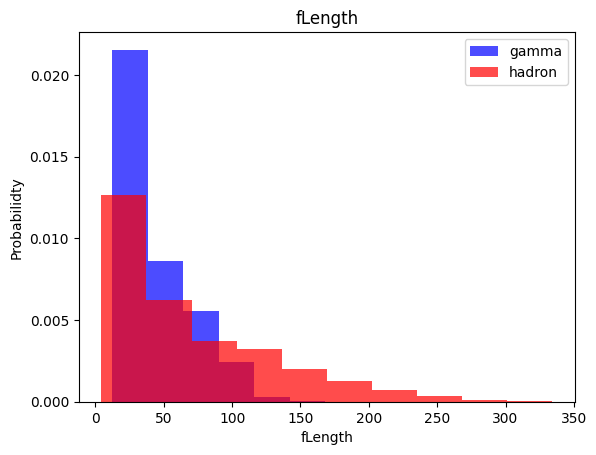

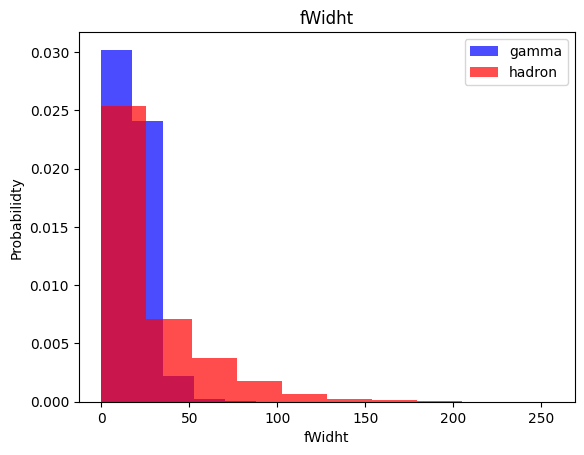

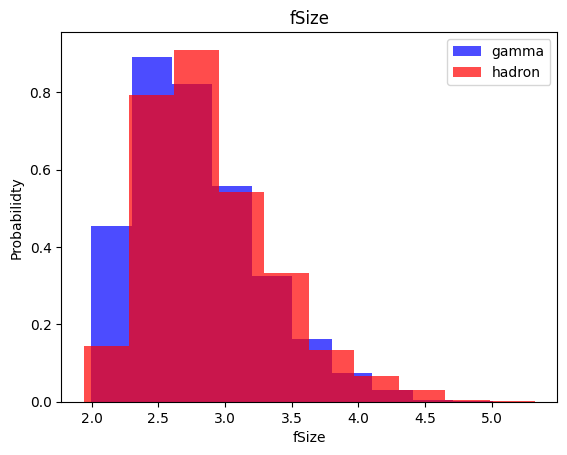

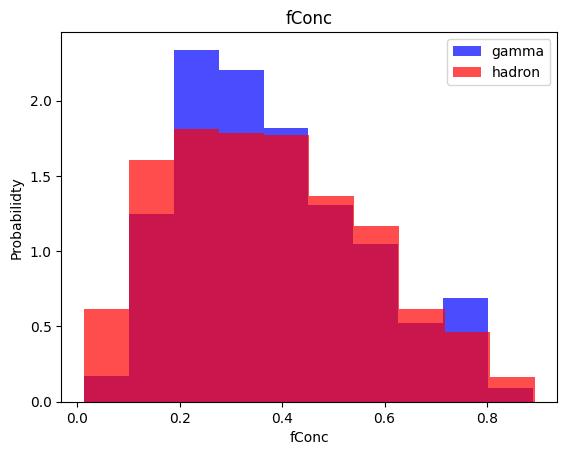

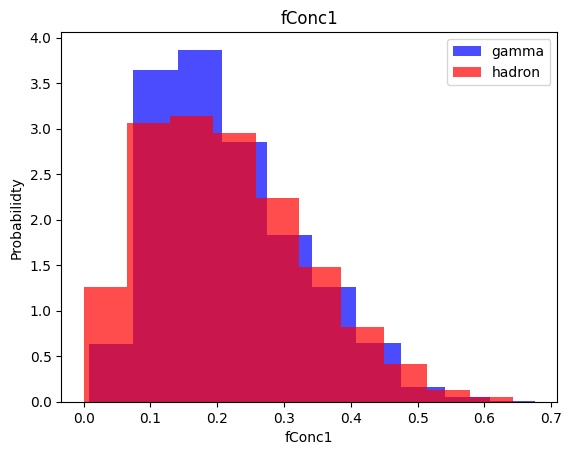

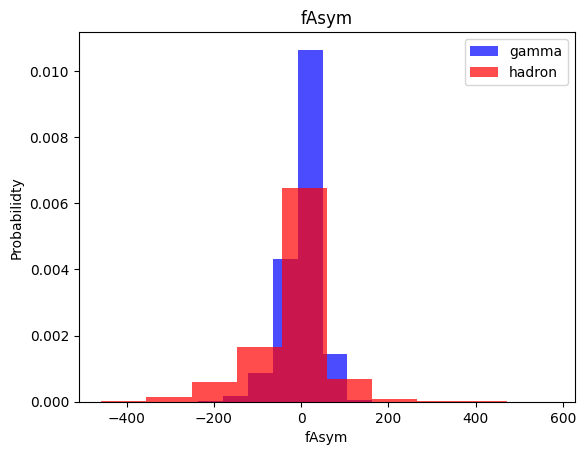

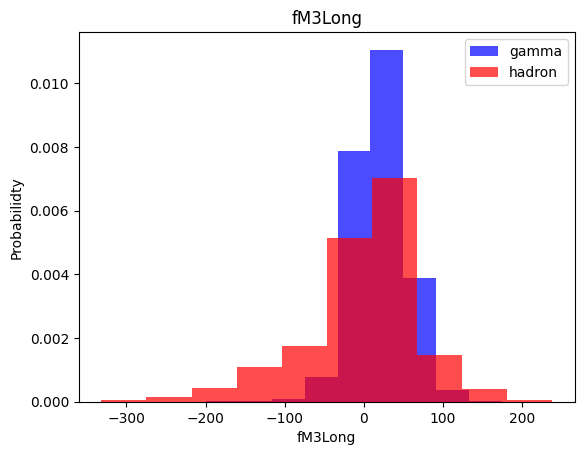

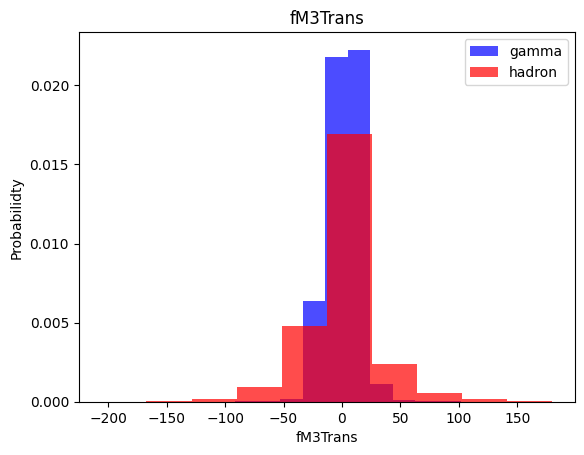

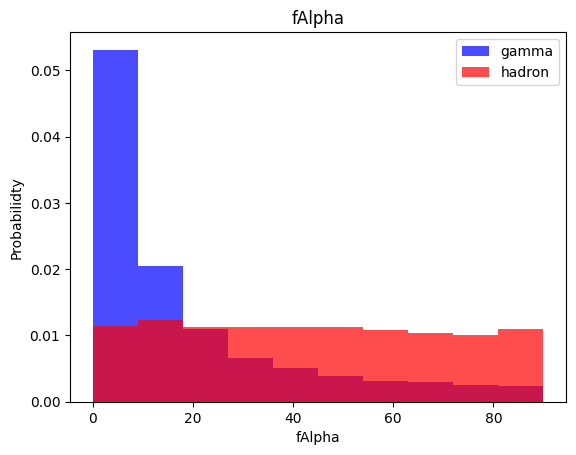

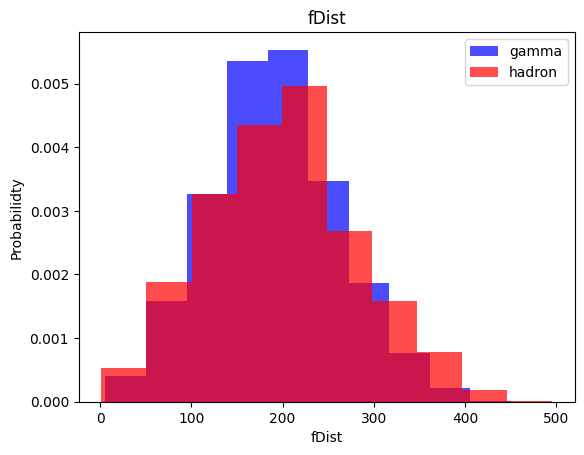

In [7]:
for label in cols[:-1]:
    plt.hist(df[df["classs"]==1][label],color="blue",label="gamma",alpha=0.7,density=True)
    plt.hist(df[df["classs"]==0][label],color="red",label="hadron",alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("Probabilidty")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [8]:
train, valid, test =  np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

In [9]:
def scaledataset(dataframe,oversampler=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)
    
    if oversampler:
        ross = RandomOverSampler()
        x, y = ross.fit_resample(X=x,y=y)
    
    data = np.hstack((x,np.reshape(y,(-1,1))))

    return data, x, y

In [10]:
train, x_train, y_train = scaledataset(train,oversampler=True)
valid, x_valid, y_valid = scaledataset(valid,oversampler=False)
test, x_test, y_test = scaledataset(test,oversampler=False)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn_model.predict(x_test)

In [14]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1313
           1       0.86      0.87      0.87      2491

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



![image.png](C:\Users\Usuario\Desktop\octaprograma\TrueAndFalsePositives.png)


In [16]:
from sklearn.naive_bayes import GaussianNB

In [17]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

In [18]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.42      0.51      1313
           1       0.74      0.89      0.81      2491

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [19]:
from sklearn.linear_model import LogisticRegression


In [20]:
lore_model = LogisticRegression()
lore_model = lore_model.fit(x_train,y_train)

In [21]:
y_pred = lore_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1313
           1       0.85      0.82      0.84      2491

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



In [22]:
from sklearn.svm import SVC


In [23]:
svc_model = SVC()
svc_model = svc_model.fit(x_train,y_train)


In [24]:
y_pred = svc_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1313
           1       0.90      0.90      0.90      2491

    accuracy                           0.87      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [1]:
import tensorflow as tf

In [27]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation="relu",input_shape=[10,]),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [32]:
history = nn_model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2,verbose=0)

In [34]:
def plot_loss(history):
    plt.plot(history.history["loss"],label="loss")
    plt.plot(history.history["val_loss"],label="val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Binary crossentropy")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_acurracy(history):
    plt.plot(history.history["accuracy"],label="accuracy")
    plt.plot(history.history["val_accuracy"],label="val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.grid(True)
    plt.show()

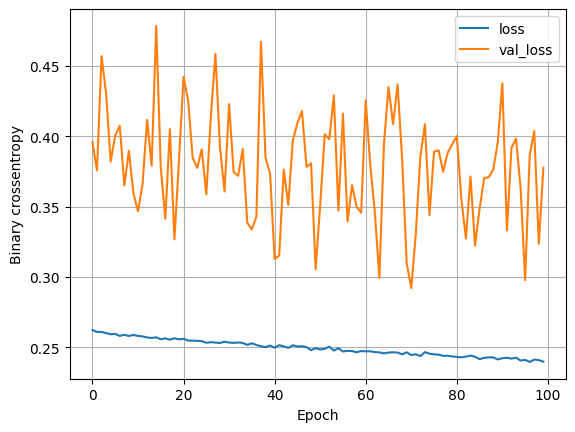

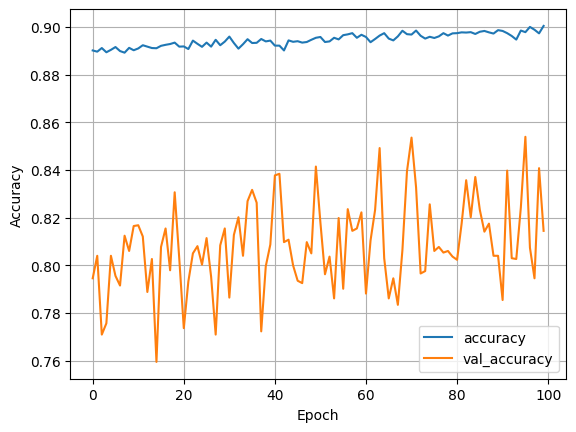

In [35]:
plot_loss(history=history)
plot_acurracy(history=history)